<a href="https://colab.research.google.com/github/navaneeth1228/Deep-Learning/blob/main/Transfer_Learning_and_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import os

In [ ]:
from tensorflow.keras.datasets import cifar10
train_ds, test_ds = cifar10.load_data() 

In [ ]:
split = int(train_ds[0].shape[0]*.8)
train_ds,val_ds = (train_ds[0][:split],train_ds[1][:split]),(train_ds[0][split:],train_ds[1][split:])
data_augumentation = tf.keras.Sequential([
    tfl.Resizing(32,32),                                      
    tfl.Rescaling(1./255),
    tfl.RandomFlip(),
    tfl.RandomRotation(factor=.2),
    tfl.RandomContrast(factor=(.2,.8),),
    tfl.RandomZoom(height_factor=(.1,.1))
])

def preprocess(x,y):
    return data_augumentation(x), tf.one_hot(tf.squeeze(y),10)

train_ds = tf.data.Dataset.from_tensor_slices(train_ds).map(preprocess).batch(64)
val_ds = tf.data.Dataset.from_tensor_slices(val_ds).map(preprocess).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices(test_ds).map(preprocess).batch(64)

In [ ]:
base_model = tf.keras.applications.VGG16(include_top=False,weights = "imagenet",input_shape=(32,32,3))


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tfl.Flatten(),
    tfl.Dense(256,activation="relu"),
    tfl.Dense(128,activation="relu"),
    tfl.Dense(64,activation="relu"),
    tfl.Dense(10,activation = "softmax")
])


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,887,818
Trainable params: 14,887,818


In [ ]:
model.layers[0].trainable=False

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,887,818
Trainable params: 173,130
Non

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history_1=model.fit(train_ds,validation_data = val_ds,epochs=5,callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs")])

Epoch 1/5
625/625 [==============================] - 79s 108ms/step - loss: 1.7198 - accuracy: 0.3853 - val_loss: 1.6201 - val_accuracy: 0.4206
Epoch 2/5
625/625 [==============================] - 66s 106ms/step - loss: 1.5756 - accuracy: 0.4370 - val_loss: 1.5662 - val_accuracy: 0.4479
Epoch 3/5
625/625 [==============================] - 67s 106ms/step - loss: 1.5328 - accuracy: 0.4524 - val_loss: 1.5433 - val_accuracy: 0.4517
Epoch 4/5
625/625 [==============================] - 67s 107ms/step - loss: 1.5098 - accuracy: 0.4641 - val_loss: 1.5089 - val_accuracy: 0.4627
Epoch 5/5
625/625 [==============================] - 65s 105ms/step - loss: 1.4836 - accuracy: 0.4739 - val_loss: 1.5032 - val_accuracy: 0.4628


In [ ]:
model.layers[0].trainable=True
for layers in  base_model.layers[:15]:
  layers.trainable=False


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,887,818
Trainable params: 7,252,554
N

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history_2=model.fit(train_ds,validation_data = val_ds,epochs=5,callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs")])

Epoch 1/5
625/625 [==============================] - 74s 115ms/step - loss: 1.7557 - accuracy: 0.3715 - val_loss: 1.5554 - val_accuracy: 0.4470
Epoch 2/5
625/625 [==============================] - 71s 114ms/step - loss: 1.4394 - accuracy: 0.4876 - val_loss: 1.4071 - val_accuracy: 0.5100
Epoch 3/5
625/625 [==============================] - 71s 114ms/step - loss: 1.3496 - accuracy: 0.5244 - val_loss: 1.3395 - val_accuracy: 0.5303
Epoch 4/5
625/625 [==============================] - 61s 98ms/step - loss: 1.3000 - accuracy: 0.5435 - val_loss: 1.3201 - val_accuracy: 0.5403
Epoch 5/5
625/625 [==============================] - 61s 97ms/step - loss: 1.2597 - accuracy: 0.5600 - val_loss: 1.2843 - val_accuracy: 0.5510


In [ ]:
history_1=history_1.history
history_2=history_2.history

In [ ]:
import matplotlib.pyplot as plt

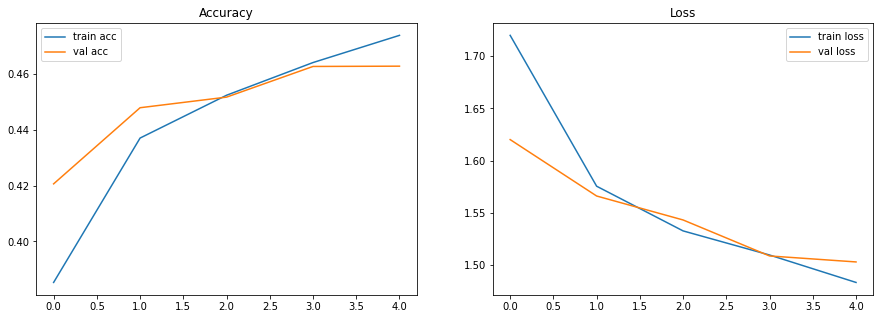

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history_1["accuracy"],label="train acc")
plt.plot(history_1["val_accuracy"],label="val acc")
plt.legend()

plt.subplot(122)
plt.title("Loss")
plt.plot(history_1["loss"],label="train loss")
plt.plot(history_1["val_loss"],label="val loss")
plt.legend()

plt.show()

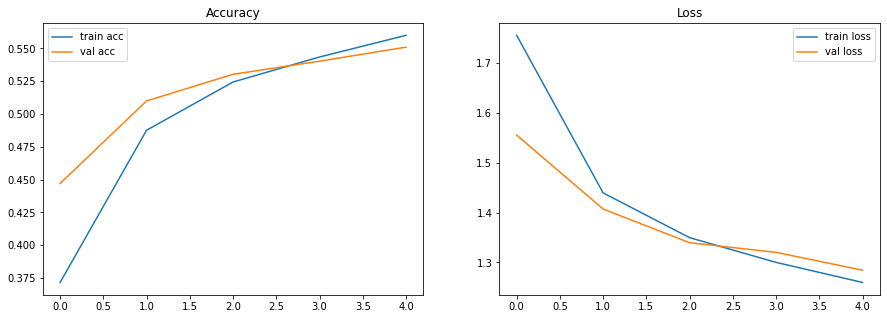

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history_2["accuracy"],label="train acc")
plt.plot(history_2["val_accuracy"],label="val acc")
plt.legend()

plt.subplot(122)
plt.title("Loss")
plt.plot(history_2["loss"],label="train loss")
plt.plot(history_2["val_loss"],label="val loss")
plt.legend()

plt.show()